In [1]:
# Input file  

incode= """
l i1 1 0 n0
mod eo1 9000k .18 1 pm n0 n1 

s s1 1 n1 n4

m PRM 0 1 0 n4 n5 # chosen arbitrarily will optimize it 
s lp 1 n5 n6
bs mainbs 0.5 0.5 0 45 n6  n7 n10 n13
s ly 1 n7 n8 
m1 ETMY 5e-06 3.75e-05 0 n8 n9
s lx 1 n10 n11
m1 ETMX 5e-06 3.75e-05 0 n11 n12
s ls 1 n13 n14


#xaxis lx L lin 0 2.128e-6 1000
xaxis ETMX phi lin 0 360 359

# pd0 PIn n4*
# pd0 AfterPRM n5
# pd0 InBS n6*
# pd0 Outy n7
# pd0 Outx n10

# pd0 iny n7*
# pd0 inx n10*
# pd0 ASDC n14

# pd0 Out n14
# pd0 REFLDC n4
# pd0 LeakX n9
# pd0 LeakY n12
#pd1 REFLI 9000k 0 n4
#pd1 REFLQ 9000k 90 n4
#pd1 ASQ 9000k 90 n14
#pd1 ASI 9000k 90 n14
#pd0 IatPRM n5*
#pd0 IatPRM n5*
#pd1 inphase 9000k 0 n1*
#pd1 quadrature 9000k 90 n1*
yaxis abs
"""

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import pykat

import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
import numpy as np 
# from numpy import arange
HH=12
WW=7
plt.rcParams.update({'font.size': 15})

                                              ..-
    PyKat 1.1.380         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



# PRMI
## Configuration 

Degrees of freedom 3
1. DARM (Lx-Ly)
2. CARM (Lx+Ly)
3. Lp (Distance of PRM from the BS)


Variables(3)
1. Reflectivity of PRM
2. Lx-Ly(Asymmetry)
3. LP


Available Demodulated Signals (6)
1. ASQ 
2. ASI
3. REFLQ
4. REFLI
5. POPQ
6. POPI


![Image not found](config.png "Title")

# Maximising sensitivity#
At the operating point the sensitivity of the interferometer for the DARM should be highest.<br>

## Config 1 : ##
In this configuration the interferometer is at the Balanced point (Lx=Ly) and Power recycling mirror is absent (Rprm=0) 
<br>
The plot of Demodulated signals with respect to tuning of ETMX is shown below . The maximum value of the signal is around 1e-8.

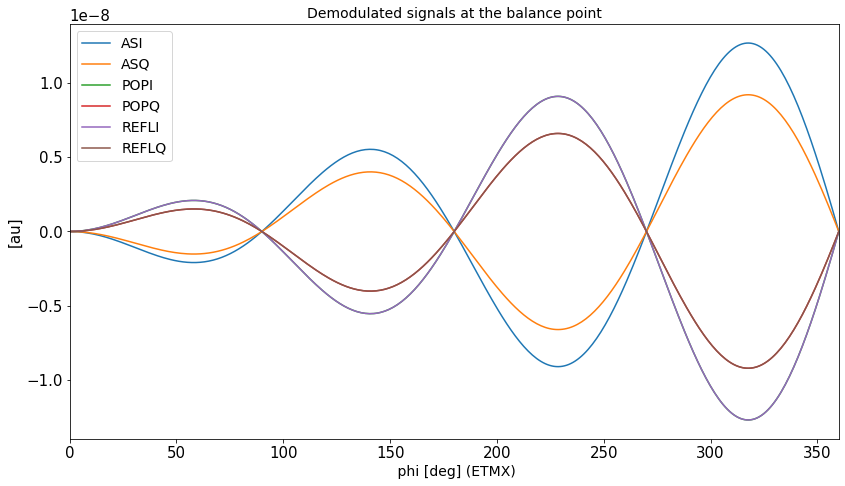

In [3]:
ob = pykat.finesse.kat()
ob.verbose = False
ob.parse(incode)
ob.parse("""pd1 ASQ 9000k 90 n14
pd1 ASI 9000k 0 n14
pd1 POPI 9000k 0 n5*
pd1 POPQ 9000k 90 n5*
pd1 REFLI 9000k 0 n4
pd1 REFLQ 9000k 90 n4
""")
# ob.PRM.R=0
# ob.PRM.T=1-ob.PRM.R
res=ob.run()
plt.rcParams['figure.figsize'] = [HH,WW]
fig = res.plot(title='Demodulated signals at the balance point')

plt.show()

# Optimization
We have to find other possible states of the interferometer where it is most sensitive for DARM.  
In order to achieve that lets vary the Lx-Ly from 0 to $\lambda_{mod}$ and plot the maximum value of the three demodulated signals(ASQ REFQ POPQ) and see if the value can be maximized.

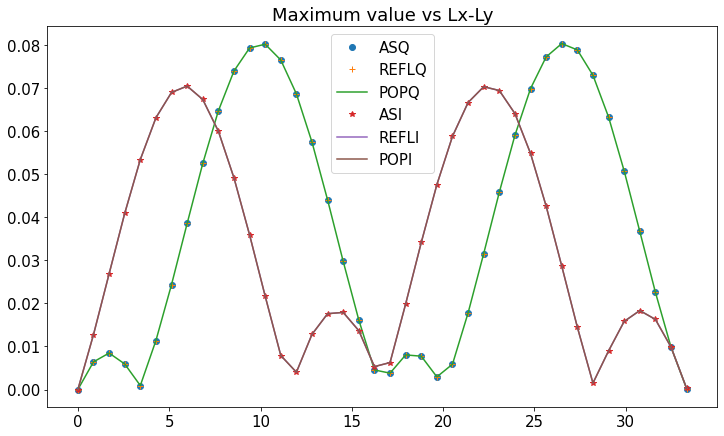

In [4]:
ob = pykat.finesse.kat()
ob.verbose = False
ob.parse(incode)
ob.parse("""pd1 ASQ 9000k 90 n14
pd1 ASI 9000k 0 n14
pd1 POPI 9000k 0 n5*
pd1 POPQ 9000k 90 n5*
pd1 REFLI 9000k 0 n4
pd1 REFLQ 9000k 90 n4
""")

# ob.ly.L=1
# ob.lx.L=1
ob.PRM.R=0
ob.PRM.T=1
n=40

dlmax=33.33
dl=np.zeros(n)
Maxasq=np.zeros(n)
Maxreflq=np.zeros(n)
Maxpopq=np.zeros(n)

Maxasi=np.zeros(n)
Maxrefli=np.zeros(n)
Maxpopi=np.zeros(n)

for i in range(n):
    dli=i*((dlmax)/(n-1))
    ob.lx.L=dli+1
#     print(ob.lx.L)
    res=ob.run()
    dl[i]=dli
    Maxasq[i]=max(res["ASQ"])
    Maxreflq[i]=max(res["REFLQ"])
    Maxpopq[i]=max(res["POPQ"])
    Maxasi[i]=max(res["ASI"])
    Maxrefli[i]=max(res["REFLI"])
    Maxpopi[i]=max(res["POPI"])
    



plt.plot(dl,Maxasq,'o',label='ASQ' )
plt.plot(dl,Maxreflq,'+',label='REFLQ')
plt.plot(dl,Maxpopq,'-',label='POPQ')
plt.plot(dl,Maxasi,'*',label='ASI')
plt.plot(dl, Maxrefli,label='REFLI')
plt.plot(dl, Maxpopi,label='POPI')


plt.legend()
plt.title("Maximum value vs Lx-Ly")
plt.rcParams['figure.figsize'] = [HH,WW]
plt.show()


In this plot we see that:<br> 
1. The In-phase signals(ASI, REFLI, POPI) have the maximum value of about 0.07 at Lx-Ly=10.24.
2. The Quadrature signals(ASQ, REFLQ, POPQ) have the maximum value of about 0.08 at at Lx-Ly=10.2.

Choosing this value of Lx-Ly=10.24 and plotting the Quadrature signals with ETMX tuning.  

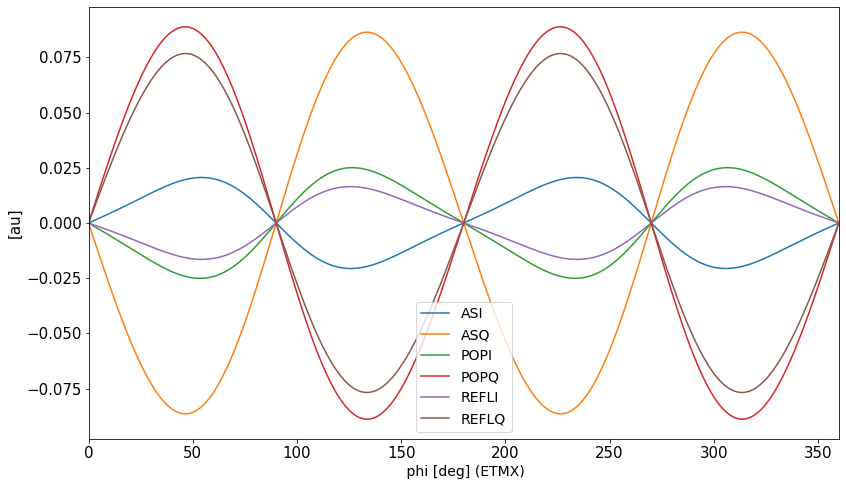

In [5]:
ob = pykat.finesse.kat()
ob.verbose = False
ob.parse(incode)
ob.parse("""pd1 ASQ 9000k 90 n14
pd1 ASI 9000k 0 n14
pd1 POPI 9000k 0 n5*
pd1 POPQ 9000k 90 n5*
pd1 REFLI 9000k 0 n4
pd1 REFLQ 9000k 90 n4
""")


ob.ly.L=1
ob.lx.L=11.203061224489796
ob.PRM.R=0.01
ob.PRM.T=1-ob.PRM.R
res=ob.run()
fig = res.plot()
plt.rcParams['figure.figsize'] = [HH,WW]
plt.show()

# Simultaneous optimization# 
In order to optimize fully we have to vary both variables(Rprm and Lx-Ly) simultaneously. We vary Rprm from 0 to 1 and Lx-Ly 0 to 𝜆𝑚𝑜𝑑 and monitor the maximum value of the demodulated signals.


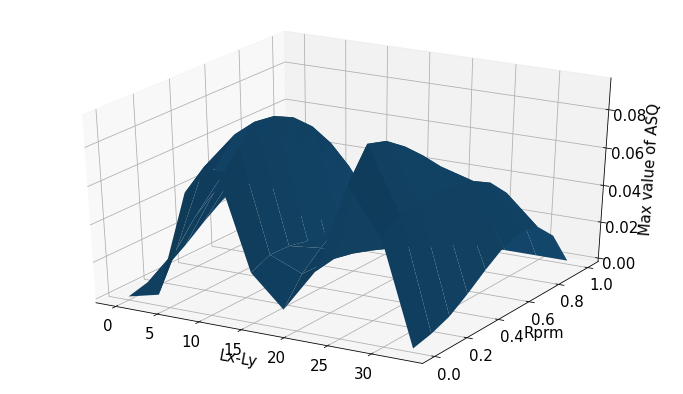

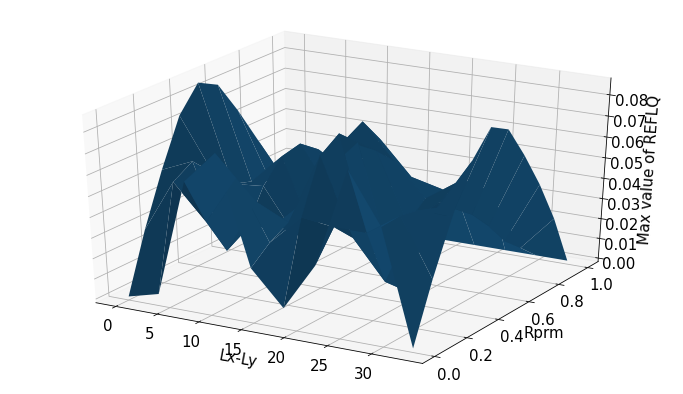

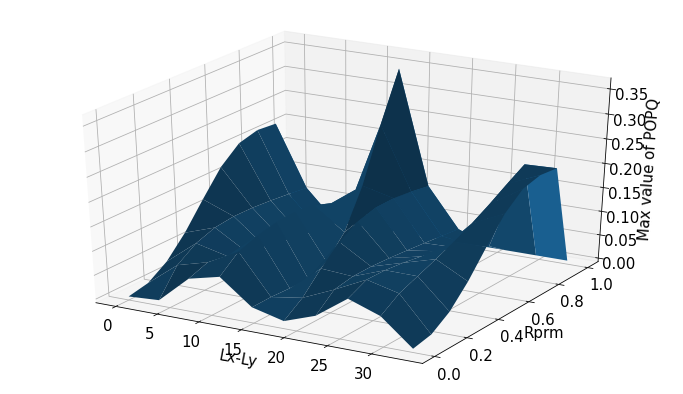

In [6]:

ob = pykat.finesse.kat()
ob.verbose = False
ob.parse(incode)
ob.parse("""pd1 ASQ 9000k 90 n14
pd1 ASI 9000k 0 n14
pd1 POPI 9000k 0 n5*
pd1 POPQ 9000k 90 n5*
pd1 REFLI 9000k 0 n4
pd1 REFLQ 9000k 90 n4
""")

# ob.ly.L=1
# ob.lx.L=1
n=10
dlmax=33.33
rmax=1
dl=np.zeros(n)
ref=np.linspace(0,rmax,n)
dl=np.linspace(0,dlmax,n)

REFLECTIVITY, DL = np.meshgrid(ref,dl)



Maxasq=np.zeros((n,n))
Maxreflq=np.zeros((n,n))
Maxpopq=np.zeros((n,n))
for j in range(n):
    for i in range(n):
        dli=i*((dlmax)/(n-1))
        r=j*((rmax)/(n-1))
        ob.PRM.R=r
        ob.PRM.T=1-r
        ob.lx.L=dli+1
    #     print(ob.lx.L)
        res=ob.run()
        dl[i]=dli
        Maxasq[i][j]=max(res["ASQ"])
        Maxreflq[i][j]=max(res["REFLQ"])
        Maxpopq[i][j]=max(res["POPQ"])
    
# print(len(dl))
# print(len(Maxasq))
# print(dl)


fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(DL,REFLECTIVITY,Maxasq)
ax.set_xlabel('Lx-Ly')
ax.set_ylabel('Rprm')
ax.set_zlabel('Max value of ASQ')
plt.rcParams['figure.figsize'] = [HH,WW]
plt.show()

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(DL,REFLECTIVITY,Maxreflq)
ax.set_xlabel('Lx-Ly')
ax.set_ylabel('Rprm')
ax.set_zlabel('Max value of REFLQ')
plt.rcParams['figure.figsize'] = [HH,WW]
plt.show()


fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(DL,REFLECTIVITY,Maxpopq)
ax.set_xlabel('Lx-Ly')
ax.set_ylabel('Rprm')
ax.set_zlabel('Max value of POPQ')
plt.rcParams['figure.figsize'] = [HH,WW]
plt.show()


## Choosing the operating Point 
As can be seen from the graph. Maximum values of the different signals are given below<br> 

ASQ has maximum value of 0.09 at Lx-Ly=26 (also at 11 ) and R=0.1<br>
REFLQ has maximum value of 0.08 at Lx-Ly= 0 (also at 33 ) and R=0.4<br>
POPQ has maximum value of at 0.35 Lx-Ly=15 and R=0.91<br>
  


The maximum value first increases with r and then decreases with r. There is an optimum value of r for which the signal is maximum.

The maximum value for POPQ is very large compared to other two therefore choosing (Lx-Ly=13.76 and R=0.9915) as our operating point.(<I> Zooming in the region by making the grid fine, reveals that the maximum value of POPQ occurs at (Lx-Ly=13.76 and R=0.9915)<I>)

## Calculating error signals at the operating point
### Keeping Ly fixed and moving Lx

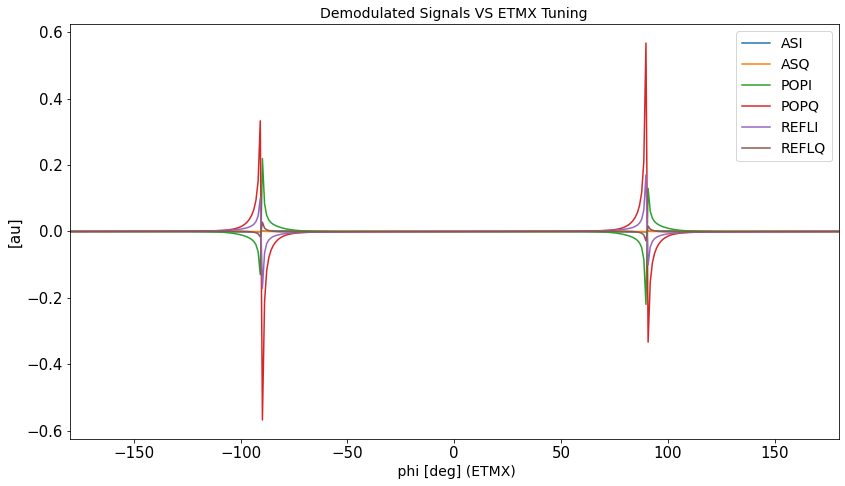

In [7]:
ob = pykat.finesse.kat()
ob.verbose = False
ob.parse(incode)
ob.parse("""pd1 ASQ 9000k 90 n14
pd1 ASI 9000k 0 n14
pd1 POPI 9000k 0 n5*
pd1 POPQ 9000k 90 n5*
pd1 REFLI 9000k 0 n4
pd1 REFLQ 9000k 90 n4
xaxis ETMX phi lin -180 180 359
""")


ob.ly.L=1
ob.lx.L=14.76
ob.PRM.R=.9915
ob.PRM.T=1-ob.PRM.R
res=ob.run()
fig = res.plot(title='Demodulated Signals VS ETMX Tuning')
plt.rcParams['figure.figsize'] = [HH,WW]

# plt.show()

## Zoomed in around phi=90
### Operating point is taken to be Lx-Ly=13.76 , Rprm=0.9915, ETMx Phi=90

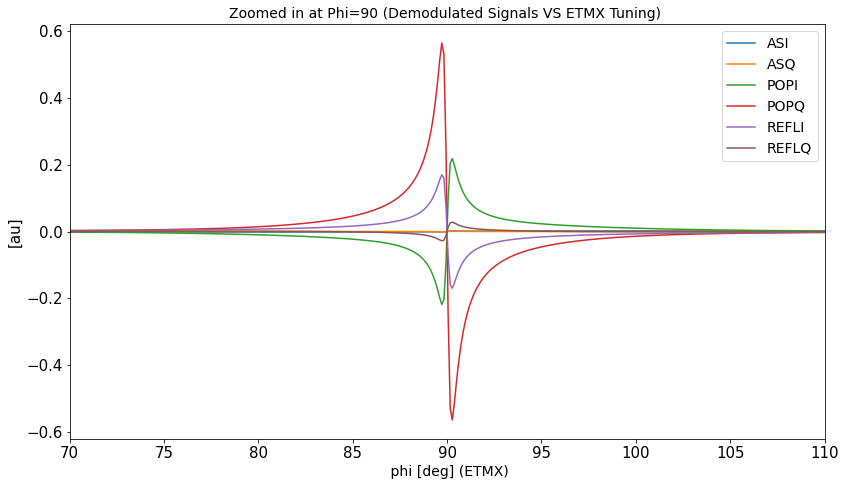

In [8]:
ob = pykat.finesse.kat()
ob.verbose = False
ob.parse(incode)
ob.parse("""pd1 ASQ 9000k 90 n14
pd1 ASI 9000k 0 n14
pd1 POPI 9000k 0 n5*
pd1 POPQ 9000k 90 n5*
pd1 REFLI 9000k 0 n4
pd1 REFLQ 9000k 90 n4
xaxis ETMX phi lin 70 110 359
""")


ob.ly.L=1
ob.lx.L=14.76
ob.PRM.R=.9915
ob.PRM.T=1-ob.PRM.R
res=ob.run()
fig = res.plot(title='Zoomed in at Phi=90 (Demodulated Signals VS ETMX Tuning) ')
plt.rcParams['figure.figsize'] = [HH,WW]

# Sensing matrix  #
Calculating the slopes of the signals at the operating point.

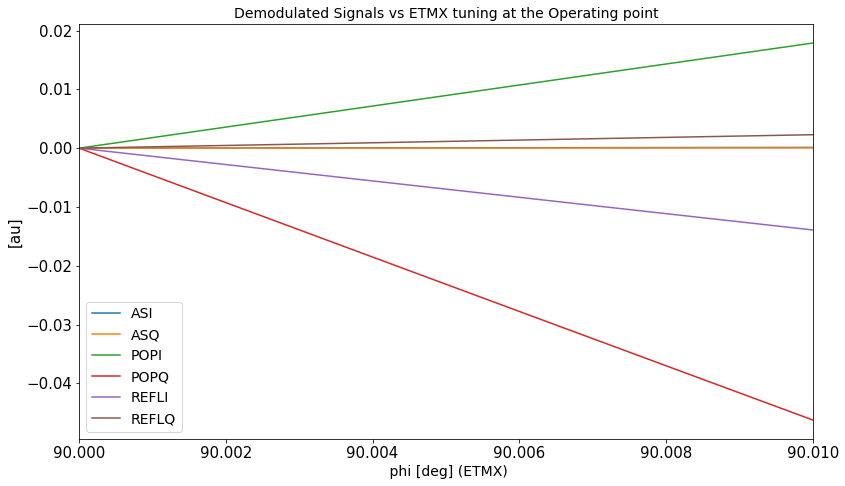

Slopes= [ 4.68e-05  1.23e-04 -4.62e-02  1.79e-02  2.29e-03 -1.39e-02]


In [16]:
ob = pykat.finesse.kat()
ob.verbose = False
ob.parse(incode)
ob.parse("""pd1 ASQ 9000k 90 n14
pd1 ASI 9000k 0 n14
pd1 POPI 9000k 0 n5*
pd1 POPQ 9000k 90 n5*
pd1 REFLI 9000k 0 n4
pd1 REFLQ 9000k 90 n4
xaxis ETMX phi lin 90 90.01 10
""")


ob.ly.L=1
ob.lx.L=14.76
ob.PRM.R=.9915
ob.PRM.T=1-ob.PRM.R
res=ob.run()
Sasq=res["ASQ"][-1]
Sasi=res["ASI"][-1]
Spopq=res["POPQ"][-1]
Spop=res["POPI"][-1]
Sreflq=res["REFLQ"][-1]
Srefli=res["REFLI"][-1]
# print(Sasq,Sasi,Spopq,Spop,Sreflq,Srefli)
# print('|',round(Sasq,4),'|',round(Sasi,4),'|',round(Spopq,4),'|',round(Spop,4),'|',round(Sreflq,4),'|',round(Srefli,4),'|')
# plt.figure(1)
np.set_printoptions(precision=2)
sx=np.array([Sasq,Sasi,Spopq,Spop,Sreflq,Srefli])
fig = res.plot(title="Demodulated Signals vs ETMX tuning at the Operating point")
print("Slopes=",sx)

## Keeping Lx fixed and moving Ly

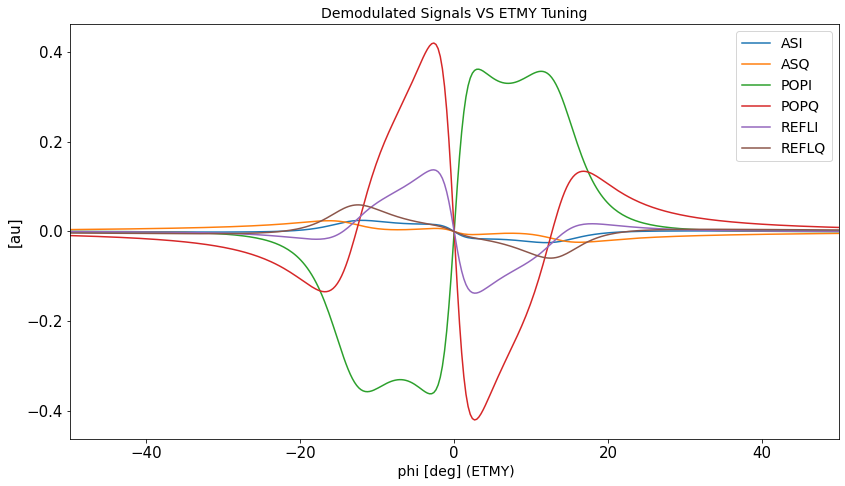

In [10]:
ob = pykat.finesse.kat()
ob.verbose = False
ob.parse(incode)
ob.parse("""pd1 ASQ 9000k 90 n14
pd1 ASI 9000k 0 n14
pd1 POPI 9000k 0 n5*
pd1 POPQ 9000k 90 n5*
pd1 REFLI 9000k 0 n4
pd1 REFLQ 9000k 90 n4
xaxis ETMY phi lin -50 50 359
""")

ob.ETMX.phi=90
ob.lx.L=14.76
ob.PRM.R=.9915
ob.PRM.R=.91
ob.PRM.T=1-ob.PRM.R
res=ob.run()
fig = res.plot(title='Demodulated Signals VS ETMY Tuning')


# plt.show()

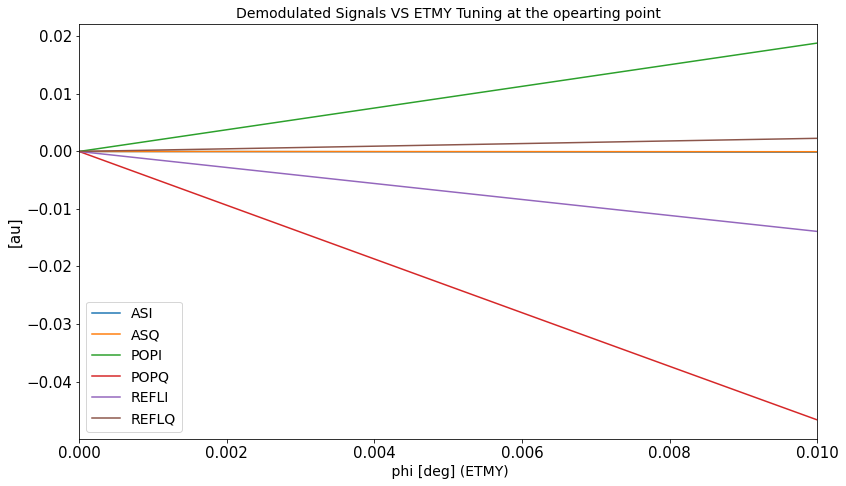

In [11]:
ob = pykat.finesse.kat()
ob.verbose = False
ob.parse(incode)
ob.parse("""pd1 ASQ 9000k 90 n14
pd1 ASI 9000k 0 n14
pd1 POPI 9000k 0 n5*
pd1 POPQ 9000k 90 n5*
pd1 REFLI 9000k 0 n4
pd1 REFLQ 9000k 90 n4
xaxis ETMY phi lin 0 0.01 10
""")

ob.ETMX.phi=90
ob.ly.L=1
ob.lx.L=14.76
ob.PRM.R=.9915
ob.PRM.T=1-ob.PRM.R
res=ob.run()
Sasq=res["ASQ"][-1]
Sasi=res["ASI"][-1]
Spopq=res["POPQ"][-1]
Spop=res["POPI"][-1]
Sreflq=res["REFLQ"][-1]
Srefli=res["REFLI"][-1]
# print(Sasq,Sasi,Spopq,Spop,Sreflq,Srefli)
# print('|',round(Sasq,4),'|',round(Sasi,4),'|',round(Spopq,4),'|',round(Spop,4),'|',round(Sreflq,4),'|',round(Srefli,4),'|')
# sy=[Sasq,Sasi,Spopq,Spop,Sreflq,Srefli]
sy=np.array([Sasq,Sasi,Spopq,Spop,Sreflq,Srefli])


fig = res.plot(title='Demodulated Signals VS ETMY Tuning at the opearting point')


# plt.show()

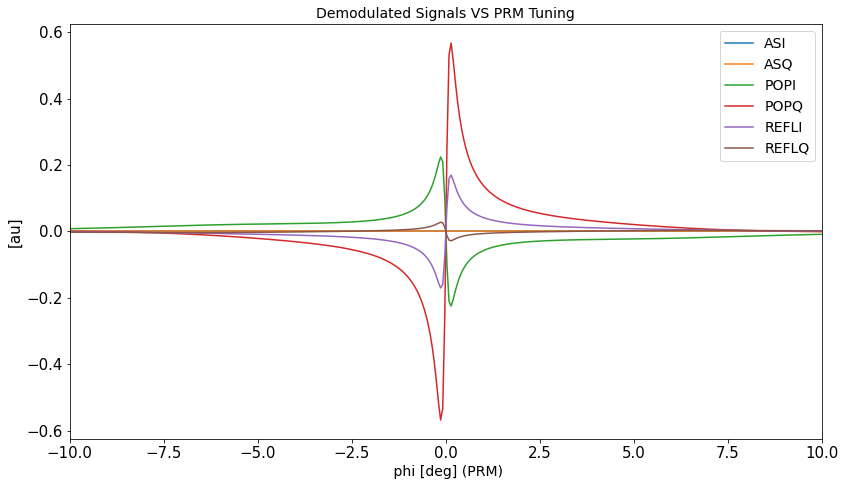

In [12]:
ob = pykat.finesse.kat()
ob.verbose = False
ob.parse(incode)
ob.parse("""pd1 ASQ 9000k 90 n14
pd1 ASI 9000k 0 n14
pd1 POPI 9000k 0 n5*
pd1 POPQ 9000k 90 n5*
pd1 REFLI 9000k 0 n4
pd1 REFLQ 9000k 90 n4
#xaxis ETMX phi lin -180 180 359
xaxis PRM phi lin -10 10 359
""")

ob.ETMX.phi=90
ob.ly.L=1
ob.lx.L=14.76
ob.PRM.R=.9915
ob.PRM.T=1-ob.PRM.R
res=ob.run()
fig = res.plot(title='Demodulated Signals VS PRM Tuning')


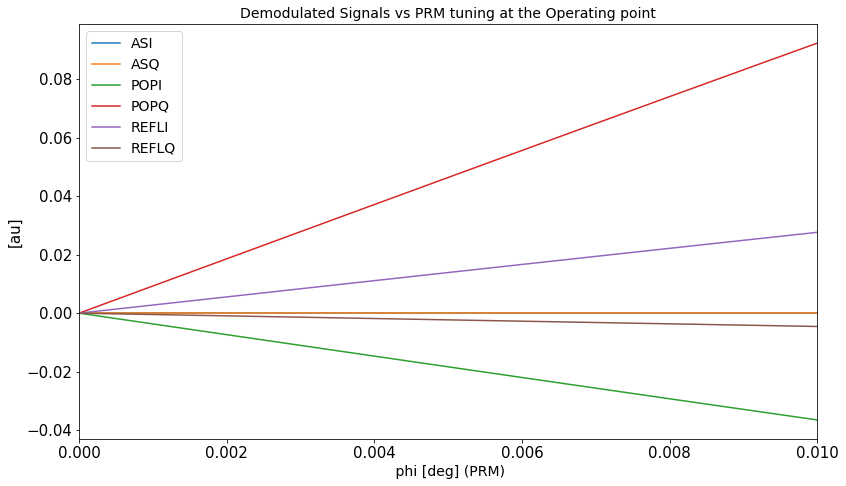

In [13]:
ob = pykat.finesse.kat()
ob.verbose = False
ob.parse(incode)
ob.parse("""pd1 ASQ 9000k 90 n14
pd1 ASI 9000k 0 n14
pd1 POPI 9000k 0 n5*
pd1 POPQ 9000k 90 n5*
pd1 REFLI 9000k 0 n4
pd1 REFLQ 9000k 90 n4
#xaxis ETMX phi lin -180 180 359
xaxis PRM phi lin 0 0.01 10
""")

ob.ETMX.phi=90
ob.ly.L=1
ob.lx.L=14.76
ob.PRM.R=.9915
ob.PRM.T=1-ob.PRM.R
res=ob.run()
Sasq=res["ASQ"][-1]
Sasi=res["ASI"][-1]
Spopq=res["POPQ"][-1]
Spop=res["POPI"][-1]
Sreflq=res["REFLQ"][-1]
Srefli=res["REFLI"][-1]
# print(Sasq,Sasi,Spopq,Spop,Sreflq,Srefli)

# print('|',round(Sasq,4),'|',round(Sasi,4),'|',round(Spopq,4),'|',round(Spop,4),'|',round(Sreflq,4),'|',round(Srefli,4),'|')
sp=np.array([Sasq,Sasi,Spopq,Spop,Sreflq,Srefli])
fig = res.plot(title='Demodulated Signals vs PRM tuning at the Operating point')
# plt.title('')
# plt.show()
# print("Lx-Ly",sx)
# print("Ly-Lx",sy)
# print("carm",(sx-sy)/2)
# print("darm",(sx+sy)/2)
# print("Lp",sp)

##for printing Sensity matrix
# np.set_printoptions(precision=2)
# print("| Lx-Ly |",end='')
# for i in range(6): 
#     print("{:.2e}".format(sx[i]),'| ',end='')
# print('')    
# print("| Ly-Lx |",end='')
# for i in range(6): 
#     print("{:.2e}".format(sy[i]),'| ',end='')
    
# print('')
# print("| CARM |",end='')

# for i in range(6): 
#     print("{:.2e}".format((sx[i]-sy[i])/2),'| ',end='')    
    
# print('')
# print("| DARM |",end='')
# for i in range(6): 
#     print("{:.2e}".format((sx[i]+sy[i])/2),'| ',end='')      
# print('')   
# print("| Lp |",end='')
# for i in range(6): 
#     print("{:.2e}".format(sp[i]),'| ',end='')  




Sensing Matrix <br>
Units are volts per 10milli degree($\lambda$/36000) .

|       | ASQ    | ASI     | POPQ   | POPI  | REFLQ  | REFLI  |
|-------|--------|---------|--------|-------|--------|--------|
| Lx-Ly |4.00e-04 | 1.06e-03 | <b>-3.97e-01 <b>| 1.53e-01 | 1.96e-02 | -1.19e-01 | 
| Ly-Lx |-4.68e-05 | -1.23e-04 |<b> -4.67e-02 <b>| 1.88e-02 | 2.28e-03 | -1.39e-02 | 
| CARM |2.24e-04 | 5.91e-04 | <b>-1.75e-01<b> | 6.73e-02 | 8.67e-03 | -5.28e-02 | 
| DARM |1.77e-04 | 4.69e-04 | <b>-2.22e-01<b> | 8.62e-02 | 1.10e-02 | -6.67e-02 | 
| Lp |-1.58e-17 | -4.15e-17 | <b>9.24e-02<b> | -3.65e-02 | -4.55e-03 | 2.77e-02 | 

<br>
Sensitivity for DARM and CARM can be obtained by adding and subtracting the two sensitivities.